<IPython.core.display.Javascript object>


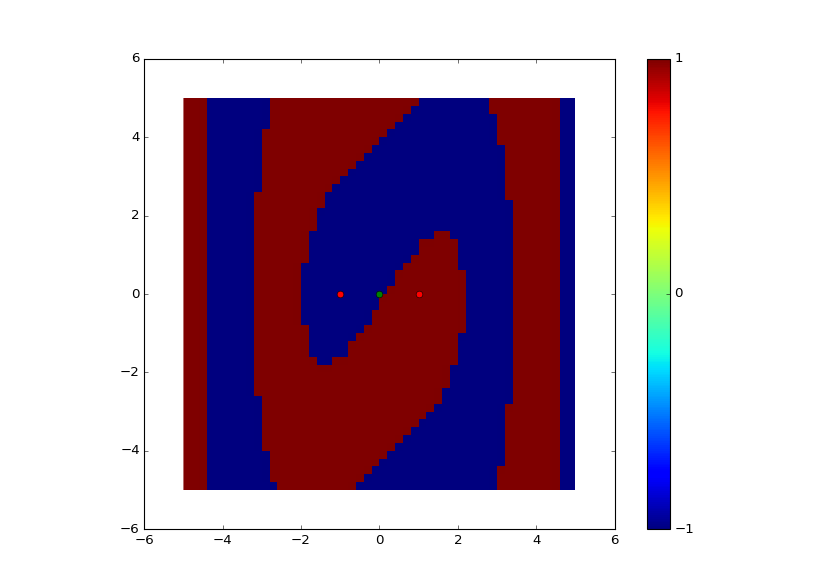

In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib notebook

#gamma
c = 1

#system of ode
def f(t,x, arg1):
    return [ x[1], -c * x[1] + x[0] - x[0]**3]
#jacobian of the system
def jac(t, x, arg1):
    return [[0, 1], [ 1-3*x[0]**2,-c]]

#function for the integration
def Int(t0,x0,y0, t1 = 100):
    r = ode(f, jac).set_integrator('dopri5')
    
    #create 5x5 field for the results
    result = np.zeros((x0[:,0].size,x0[0,:].size,2))
    
    #go through each point and integrate
    for i in range(0,x0[:,0].size):   
        for j in range(0,x0[0,:].size):   
            r.set_initial_value( [x0[i,j], y0[i,j]], t0).set_f_params(2.0).set_jac_params(2.0)
            result[i,j] = r.integrate(r.t+t1)
            
    return result

#create 5x5 meshgrid and calculate for all points the fixed point
X, Y = np.meshgrid(np.arange(-5, 5, .2), np.arange(-5, 5, .2))
Z = Int(0,X,Y,100)

#plot all x-components of Z
fig, ax = plt.subplots()
cax = ax.imshow(Z[:,:,0], extent=[-5, 5, -5, 5], interpolation='none')
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

# plot fixed points
plt.plot(0,0,'go')
plt.plot(1,0,'ro')
plt.plot(-1,0,'ro')

plt.show()



In [26]:
X, Y = np.meshgrid(np.arange(-5, 5, 1), np.arange(-5, 5, 1))
A = np.array([X,Y])
A = [1,2]
a,b = A
A = np.zeros((10,10,2))
A[5,5,:]

array([ 0.,  0.])